In [1]:
#!pip install typing-extensions==4.6.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aadhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Web scraping for iFFALCON by TCL 80.04 cm (32 inch) HD Ready LED Smart Android TV 

In [3]:
url=requests.get("https://www.flipkart.com/iffalcon-tcl-80-04-cm-32-inch-hd-ready-led-smart-android-tv-bezel-less-design-24w-speaker/p/itm592774a2e615f?pid=TVSGKNZGHCZRNEDW&lid=LSTTVSGKNZGHCZRNEDWPKDF2X&marketplace=FLIPKART&q=tv+smart+tv&store=ckf%2Fczl&srno=s_1_4&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&fm=personalisedRecommendation%2FC5&iid=e4020d2d-47f6-4d5a-adef-c920b59c2820.TVSGKNZGHCZRNEDW.SEARCH&ppt=pp&ppn=pp&ssid=xc49wt95740000001692786494817&qH=9f4f9f00d8892ecd")

In [4]:
soup=bs(url.content,"html.parser")

In [5]:
reviews=soup.find_all('div',class_=['t-ZTKy'])

In [6]:
print(reviews)

[<div class="t-ZTKy"><div><div class="">It's really a good tv<br>Pros<br/>1. Amazing picture quality at this price<br/>2. Clear and pleasant sound quality<br/>3. Installation was fast enough<br/>4. Bezel less design looks cool<br/>5. Customer support is very responsive<br/>6. You won't need additional sound bars<br/>7. Consumes almost no power in standby mode<br/>8. Auto screensaver make it look awesome when tv is in standby mode<br/>9. Google voice assistance works properly<br/>Cons<br/>1. Some apps takes time in launching<br/>2. Video lagging while connecting with mobile casting<br/>...</br></div><span class="_1BWGvX"><span>READ MORE</span></span></div></div>, <div class="t-ZTKy"><div><div class="">Value for money <br/>Best smart in budget <br/>😊😊</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div>, <div class="t-ZTKy"><div><div class="">I have been an old user of Iffalcon TV since 2019 and this is my second purchase. The TV works great, great picture quality and gre

In [7]:
rv=[]
for review in reviews:
    rv.append(review.text)
rv

["It's really a good tvPros1. Amazing picture quality at this price2. Clear and pleasant sound quality3. Installation was fast enough4. Bezel less design looks cool5. Customer support is very responsive6. You won't need additional sound bars7. Consumes almost no power in standby mode8. Auto screensaver make it look awesome when tv is in standby mode9. Google voice assistance works properlyCons1. Some apps takes time in launching2. Video lagging while connecting with mobile casting...READ MORE",
 'Value for money Best smart in budget 😊😊READ MORE',
 'I have been an old user of Iffalcon TV since 2019 and this is my second purchase. The TV works great, great picture quality and great sound. Easy to connect...Google TV is smooth and useful. And in this price point it is the best you can buy.READ MORE',
 'Awesome Tv ❣️READ MORE',
 'IFFALCON F53 ANDROID 11 LED TV IS REALLY GREAT AND TOTALLY AWESOME PRODUCT.THANK IFFALCON AND FLIPKART FOR SUCH WONDERFUL 32 ANDROID 11 TV ❤️💯👌👌TOTALLY VALUE FOR 

In [8]:
data={'Reviews':rv}

In [9]:
review_data=pd.DataFrame(data)

In [10]:
review_data.to_csv('C:\\Users\\aadhi\\Desktop\\reviews.csv')

In [11]:
review_data

,Reviews
0,It's really a good tvPros1. Amazing picture qu...
1,Value for money Best smart in budget 😊😊READ MORE
2,I have been an old user of Iffalcon TV since 2...
3,Awesome Tv ❣️READ MORE
4,IFFALCON F53 ANDROID 11 LED TV IS REALLY GREAT...
5,GoodREAD MORE
6,"Nambi vangalam , thank you my Flipkart jiVery ..."
7,Best ledREAD MORE
8,Pros1. Automatic Connectivity with wifi hotspo...
9,Great picture quality 👌READ MORE


### Data Preprocessing

### Special characters removal

In [12]:
review_data.Reviews=review_data.Reviews.apply(lambda x: re.sub('[^a-zA-Z ]',"",x))
review_data

,Reviews
0,Its really a good tvPros Amazing picture quali...
1,Value for money Best smart in budget READ MORE
2,I have been an old user of Iffalcon TV since ...
3,Awesome Tv READ MORE
4,IFFALCON F ANDROID LED TV IS REALLY GREAT AND...
5,GoodREAD MORE
6,Nambi vangalam thank you my Flipkart jiVery v...
7,Best ledREAD MORE
8,Pros Automatic Connectivity with wifi hotspot ...
9,Great picture quality READ MORE


### Lower casing

In [13]:
review_data.Reviews=review_data.Reviews.apply(lambda x: x.lower())
review_data

,Reviews
0,its really a good tvpros amazing picture quali...
1,value for money best smart in budget read more
2,i have been an old user of iffalcon tv since ...
3,awesome tv read more
4,iffalcon f android led tv is really great and...
5,goodread more
6,nambi vangalam thank you my flipkart jivery v...
7,best ledread more
8,pros automatic connectivity with wifi hotspot ...
9,great picture quality read more


### Tokenization

In [14]:
review_data.Reviews=review_data.Reviews.apply(lambda x: x.split())
review_data

,Reviews
0,"[its, really, a, good, tvpros, amazing, pictur..."
1,"[value, for, money, best, smart, in, budget, r..."
2,"[i, have, been, an, old, user, of, iffalcon, t..."
3,"[awesome, tv, read, more]"
4,"[iffalcon, f, android, led, tv, is, really, gr..."
5,"[goodread, more]"
6,"[nambi, vangalam, thank, you, my, flipkart, ji..."
7,"[best, ledread, more]"
8,"[pros, automatic, connectivity, with, wifi, ho..."
9,"[great, picture, quality, read, more]"


### Stop words removal

In [15]:
review_data.Reviews=review_data.Reviews.apply(lambda x: [word for word in x if word not in set(stopwords.words('english'))])
review_data

,Reviews
0,"[really, good, tvpros, amazing, picture, quali..."
1,"[value, money, best, smart, budget, read]"
2,"[old, user, iffalcon, tv, since, second, purch..."
3,"[awesome, tv, read]"
4,"[iffalcon, f, android, led, tv, really, great,..."
5,[goodread]
6,"[nambi, vangalam, thank, flipkart, jivery, nic..."
7,"[best, ledread]"
8,"[pros, automatic, connectivity, wifi, hotspot,..."
9,"[great, picture, quality, read]"


### Stemming

In [16]:
ps=PorterStemmer()
review_data.Reviews=review_data.Reviews.apply(lambda x: [ps.stem(word) for word in x])
review_data

,Reviews
0,"[realli, good, tvpro, amaz, pictur, qualiti, p..."
1,"[valu, money, best, smart, budget, read]"
2,"[old, user, iffalcon, tv, sinc, second, purcha..."
3,"[awesom, tv, read]"
4,"[iffalcon, f, android, led, tv, realli, great,..."
5,[goodread]
6,"[nambi, vangalam, thank, flipkart, jiveri, nic..."
7,"[best, ledread]"
8,"[pro, automat, connect, wifi, hotspot, better,..."
9,"[great, pictur, qualiti, read]"


### Joining

In [17]:
review_data.Reviews=review_data.Reviews.apply(lambda x: " ".join(x))
review_data

,Reviews
0,realli good tvpro amaz pictur qualiti price cl...
1,valu money best smart budget read
2,old user iffalcon tv sinc second purchas tv wo...
3,awesom tv read
4,iffalcon f android led tv realli great total a...
5,goodread
6,nambi vangalam thank flipkart jiveri nicegood ...
7,best ledread
8,pro automat connect wifi hotspot better mi and...
9,great pictur qualiti read


### CountVectorizing

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(review_data.Reviews.values).toarray()
X=pd.DataFrame(x,columns=cv.get_feature_names_out())
X

,addit,allow,almost,amaz,android,app,assist,auto,automat,awesom,...,valu,vangalam,video,visibl,voic,whitish,wifi,wonder,wont,work
0,1,0,1,1,0,1,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,1,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


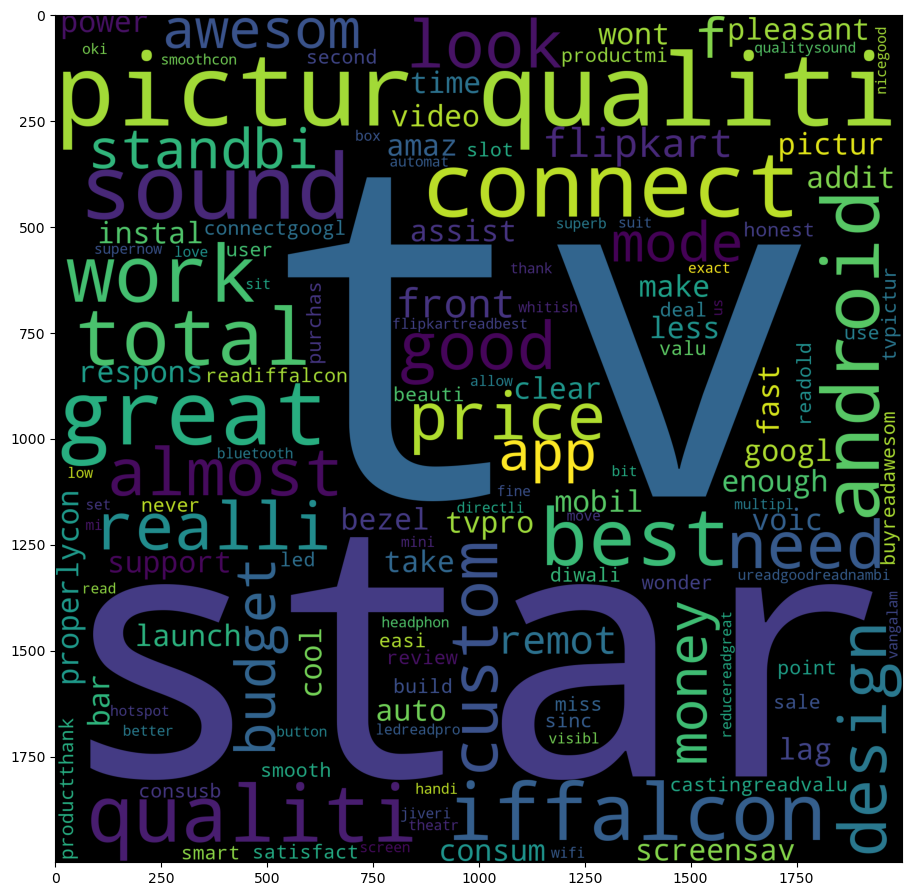

In [19]:
from wordcloud import WordCloud
worldcloud_text=''.join(review_data['Reviews'])
worldcloud=WordCloud(background_color='Black',width=2000,height=2000).generate(worldcloud_text)
worldcloud

plt.figure(figsize=(18,11))
plt.imshow(worldcloud)
plt.show()

In [20]:
from textblob import TextBlob
review_data['polarity']=review_data.Reviews.apply(lambda x : TextBlob(x).sentiment[0])
review_data

,Reviews,polarity
0,realli good tvpro amaz pictur qualiti price cl...,0.301852
1,valu money best smart budget read,0.607143
2,old user iffalcon tv sinc second purchas tv wo...,0.537500
3,awesom tv read,0.000000
4,iffalcon f android led tv realli great total a...,0.300000
5,goodread,0.000000
6,nambi vangalam thank flipkart jiveri nicegood ...,0.500000
7,best ledread,1.000000
8,pro automat connect wifi hotspot better mi and...,0.552381
9,great pictur qualiti read,0.800000


In [21]:
review_data.insert(column='emotion',value='',loc=2)
review_data

,Reviews,polarity,emotion
0,realli good tvpro amaz pictur qualiti price cl...,0.301852,
1,valu money best smart budget read,0.607143,
2,old user iffalcon tv sinc second purchas tv wo...,0.537500,
3,awesom tv read,0.000000,
4,iffalcon f android led tv realli great total a...,0.300000,
5,goodread,0.000000,
6,nambi vangalam thank flipkart jiveri nicegood ...,0.500000,
7,best ledread,1.000000,
8,pro automat connect wifi hotspot better mi and...,0.552381,
9,great pictur qualiti read,0.800000,


In [22]:
def senti(text):
    if text<0.5:
        return 'negative'
    elif text==0.5:
        return 'neutral'
    else:
        return 'positive'

review_data['emotion']=review_data['polarity'].apply(senti)

In [23]:
review_data

,Reviews,polarity,emotion
0,realli good tvpro amaz pictur qualiti price cl...,0.301852,negative
1,valu money best smart budget read,0.607143,positive
2,old user iffalcon tv sinc second purchas tv wo...,0.537500,positive
3,awesom tv read,0.000000,negative
4,iffalcon f android led tv realli great total a...,0.300000,negative
5,goodread,0.000000,negative
6,nambi vangalam thank flipkart jiveri nicegood ...,0.500000,neutral
7,best ledread,1.000000,positive
8,pro automat connect wifi hotspot better mi and...,0.552381,positive
9,great pictur qualiti read,0.800000,positive


#### Emotions countplot

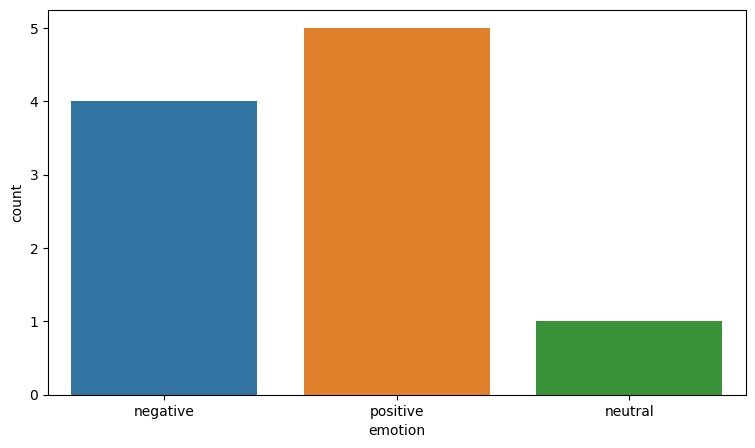

In [24]:
plt.figure(figsize=(9,5))
sns.countplot(x=review_data['emotion'])
plt.show()

In [25]:
review_data.emotion.value_counts(normalize=True).mul(100)

positive    50.0
negative    40.0
neutral     10.0
Name: emotion, dtype: float64

### Half of the review for the iFFALCON TCL smart tv is positive.
### But 40% of them expressed negative comments while 10% was neutral